Proyek Analisis Data: [E-Commerce Public Dataset]
- Nama: Ronaria Elisabeth Buaton
- Email: 5026211047@student.its.ac.id
- ID Dicoding: ronariabuaton

Menentukan Pertanyaan Bisnis
1. Berapa banyak pelanggan di setiap kota atau negara bagian?
2. Produk apa yang memiliki penjualan tertinggi?
3. Bagaimana performa waktu pengiriman dibandingkan dengan estimasi?
4. Bagaimana tingkat kepuasan customer terhadap layanan penjual?
5. Bagaimana kinerja penjual berdasarkan lokasi?
6. Adakah korelasi antara lokasi pelanggan dengan produk yang dibeli?
7. Apa metode pembayaran yang paling umum digunakan?

In [1]:
#Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA WRANGLING
1.Gathering Data: Membaca file CSV ke dalam DataFrame

In [2]:
customers_df = pd.read_csv('Customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv('Geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


2. Assessing Data: Mendapat pemahaman awal tentang struktur, tipe data, dan potensi masalah seperti nilai yang hilang 

In [11]:
customers_df.info()
geolocation_df.info()
order_items_df.info()
order_payments_df.info()
order_reviews_df.info()
orders_df.info()
product_category_translation_df.info()
products_df.info()
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
product_category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [19]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  261831
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [22]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [23]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [25]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [26]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [27]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
product_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [29]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [30]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


3. Cleaning Data: Meningkatkan kualitas data

Sebelum melakukan cleaning data, berikut adalah hasil yang saya peroleh setelah melakukan proses assessing data sebelumnya.
1. Customer:
   - Tidak terdapat nilai null
   - Tidak terdapat duplikasi
2. Geolocation:
   - Tidak terdapat nilai null
   - Terdapat duplikasi
3. Order Items:
   - Tidak terdapat nilai null
   - Tidak terdapat duplikasi
4. Order Payments:
   - Tidak terdapat nilai null
   - Tidak terdapat duplikasi
5. Order Reviews:
   - Terdapat kolom-kolom dengan nilai null, seperti review_comment_title dan review_comment_message.
   - Tidak terdapat duplikasi.
6. Orders
   - Terdapat kolom-kolom dengan nilai null, seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.
   - Tidak terdapat duplikasi
7. Product Categoey Translation
   - Tidak terdapat nilai null
   - Tidak terdapat duplikasi
8. Products
   - Terdapat beberapa nilai null pada kolom-kolom seperti product_category_name, product_name_lenght, dan lainnya.
   - Tidak terdapat duplikasi.
9. Sellers
    - Tidak terdapat nilai null
    - Tidak terdapat duplikasi.

In [31]:
customers_df.drop_duplicates(inplace=True)

In [32]:
geolocation_df.drop_duplicates(inplace=True)

In [33]:
order_items_df.drop_duplicates(inplace=True)

In [34]:
order_payments_df.drop_duplicates(inplace=True)

In [35]:
order_reviews_df.drop_duplicates(inplace=True)
order_reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

In [36]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna('2024-01-01')
orders_df.drop_duplicates(inplace=True)

In [37]:
product_category_translation_df.drop_duplicates(inplace=True)

In [38]:
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])
products_df.drop_duplicates(inplace=True)

In [39]:
sellers_df.drop_duplicates(inplace=True)

EXPLORATORY DATA ANALYSIS (EDA)
- Memahami struktur dataset, mengidentifikasi pola, melihat hubungan antarvariabel, dan mendapatkan wawasan awal sebelum melangkah ke analisis lebih lanjut

In [40]:
customer_count_by_city_df = customers_df['customer_city'].value_counts()

In [41]:
product_sales_df = order_items_df.groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)

In [42]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

In [43]:
average_review_score_df = order_reviews_df['review_score'].mean()

In [44]:
seller_performance_df = sellers_df['seller_city'].value_counts()

In [45]:
order_customer_location_product_df = pd.merge(order_items_df, orders_df[['order_id', 'customer_id']], on='order_id')
customer_location_product_df = pd.merge(order_customer_location_product_df, customers_df[['customer_id', 'customer_city']], on='customer_id')

kolom_numerik_df = customer_location_product_df.select_dtypes(include=[np.number]).columns

matriks_korelasi_df = customer_location_product_df[kolom_numerik_df].corr()

In [46]:
payment_method_distribution_df = order_payments_df['payment_type'].value_counts()

VIZUALIZATION & EXPLANATORY ANALYSIS
- Hasil visualisasi dari EDA

In [47]:
# Kota dengan Jumlah Pelanggan Terbanyak
max_customer_city_df = customer_count_by_city_df.idxmax()
max_customer_count_df = customer_count_by_city_df.max()
print(f"Kota dengan Jumlah Pelanggan Terbanyak: {max_customer_city_df} ({max_customer_count_df} pelanggan)")

Kota dengan Jumlah Pelanggan Terbanyak: sao paulo (15540 pelanggan)


In [48]:
# Kota dengan Jumlah Pelanggan Paling Sedikit
min_customer_city_df = customer_count_by_city_df.idxmin()
min_customer_count_df = customer_count_by_city_df.min()
print(f"Kota dengan Jumlah Pelanggan Paling Sedikit: {min_customer_city_df} ({min_customer_count_df} pelanggan)")

Kota dengan Jumlah Pelanggan Paling Sedikit: virginia (1 pelanggan)


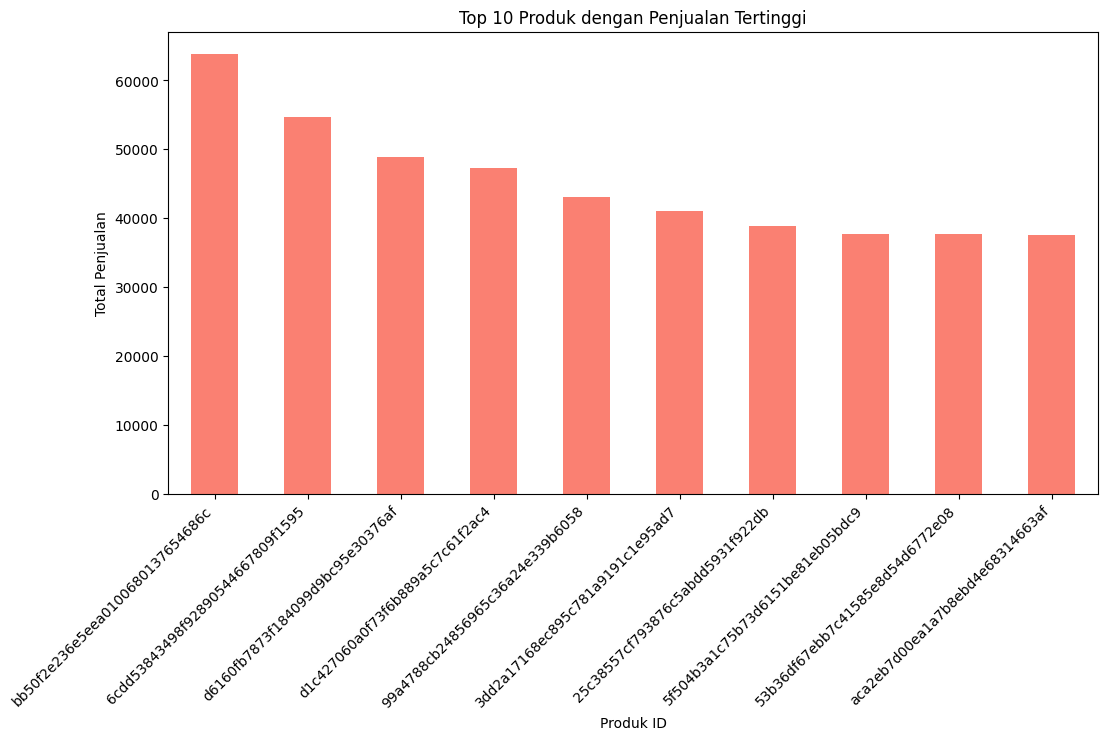

In [49]:
#Top 10 Produk dengan Penjualan Tertinggi
plt.figure(figsize=(12, 6))
product_sales_df.plot(kind='bar', color="salmon")
plt.title("Top 10 Produk dengan Penjualan Tertinggi")
plt.xlabel("Produk ID")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45, ha='right')
plt.show()

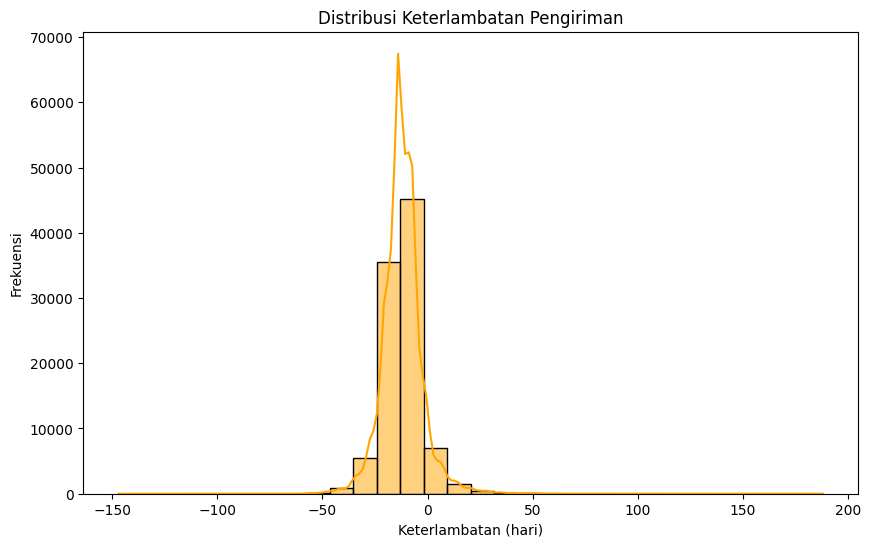

In [50]:
#Distribusi Keterlambatan Pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_delay'], bins=30, kde=True, color="orange")
plt.title("Distribusi Keterlambatan Pengiriman")
plt.xlabel("Keterlambatan (hari)")
plt.ylabel("Frekuensi")
plt.show()

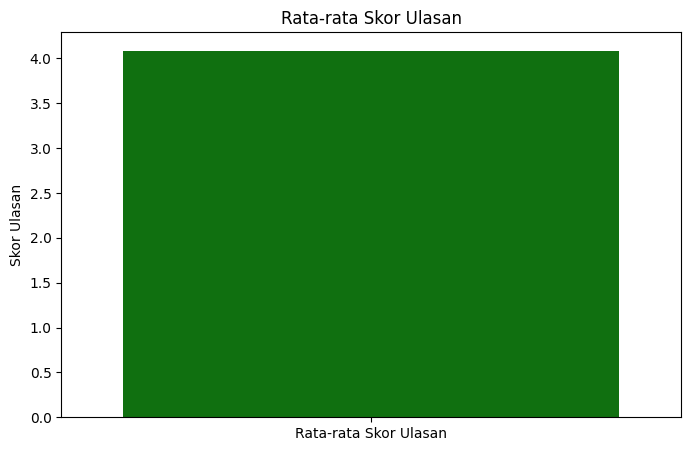

In [51]:
#Rata-rata Skor Ulasan
plt.figure(figsize=(8, 5))
sns.barplot(x=['Rata-rata Skor Ulasan'], y=[average_review_score_df], color="green")
plt.title("Rata-rata Skor Ulasan")
plt.ylabel("Skor Ulasan")
plt.show()

In [52]:
# Kota dengan Jumlah Penjual Terbanyak
max_seller_city_df = seller_performance_df.idxmax()
max_seller_count_df = seller_performance_df.max()
print(f"Kota dengan Jumlah Penjual Terbanyak: {max_seller_city_df} ({max_seller_count_df} penjual)")

Kota dengan Jumlah Penjual Terbanyak: sao paulo (694 penjual)


In [53]:
# Kota dengan Jumlah penjual Terendah
min_seller_city_df = seller_performance_df.idxmin()
min_seller_count_df = seller_performance_df.min()
print(f"Kota dengan Jumlah Penjual Terendah: {min_seller_city_df} ({min_seller_count_df} penjual)")

Kota dengan Jumlah Penjual Terendah: taio (1 penjual)


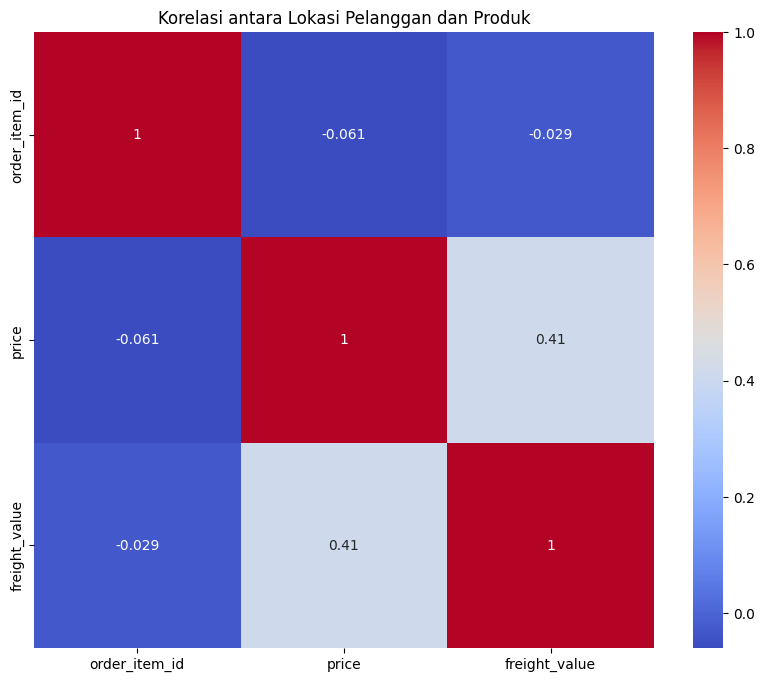

In [54]:
# Korelasi antara Lokasi Pelanggan dengan Produk
order_customer_location_product_df = pd.merge(order_items_df, orders_df[['order_id', 'customer_id']], on='order_id')
customer_location_product_df = pd.merge(order_customer_location_product_df, customers_df[['customer_id', 'customer_city']], on='customer_id')

# Pilih kolom yang bukan tipe data string
numerical_columns_df = customer_location_product_df.select_dtypes(include=['number']).columns
correlation_matrix_df = customer_location_product_df[numerical_columns_df].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm')
plt.title("Korelasi antara Lokasi Pelanggan dan Produk")
plt.show()

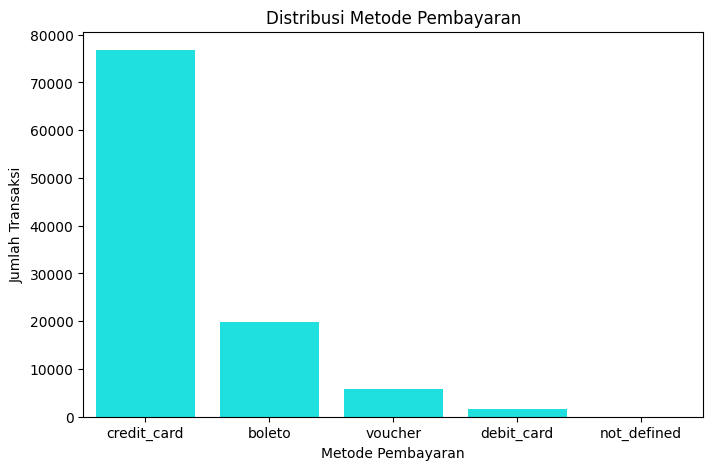

In [55]:
#Distribusi Metode Pembayaran
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_method_distribution_df.index, y=payment_method_distribution_df.values, color="cyan")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

CONCLUTION
1. Berapa banyak pelanggan di setiap kota atau negara bagian?
   - Kota dengan jumlah pelanggan terbanyak berada di Sao Paulo
   - Kota dengan jumlah pelanggan paling sedikit berada di Virginia

2. Produk apa yang memiliki penjualan tertinggi?
   - Produk dengan penjualan tertinggi adalah produk dengan id bb50fe236e5eea0100680137654686c

3. Bagaimana performa waktu pengiriman dibandingkan dengan estimasi?
   - Analisis waktu pengiriman menunjukkan bahwa pengiriman rata-rata lebih cepat atau sesuai dengan waktu estimasi

4. Bagaimana tingkat kepuasan pelanggan terhadap layanan penjual?
   - Berdasarkan grafik yang diperoleh, tingkat kepuasan pelanggan terhadap layanan penjual berada pada skor 4, yang berarti bahwa pelanggan merasa puas terhadap layanan penjual

5. Bagaimana kinerja penjual berdasarkan lokasi?
   - Penjual di Sao Paulo memiliki kinerja tertinggi.
   - Penjual di Taio memiliki kinerja terendah.

6. Adakah korelasi antara lokasi pelanggan dengan produk yang dibeli?
   - Terdapat korelasi negatif yang lemah antara lokasi pelanggan dengan produk yang dibeli. Ini mungkin berkaitan dengan biaya pengiriman, persaingan, dan permintaan.

7. *Apa metode pembayaran yang paling umum digunakan?
   - Metode pembayaran yang paling umum digunakan adalah credit card. Ini mungkin dapat menjadi salah satu faktor yang dapat dimanfaatkan penjual dalam perihal diskon, promo, dan sejenisnya.

- Dapat diketahui bahwa wilayah Sao Paulo merupakan wilayah dengan tingkat produksi dan konsumsi paling besar untuk keberlangsungan pasar E-Commerce ini

In [64]:
from functools import reduce

# Daftar semua DataFrame yang ingin disamakan
dataframes = [customers_df, orders_df, order_items_df, order_payments_df, order_reviews_df, products_df, sellers_df]

def merge_dataframes(left, right, merge_key):
    return pd.merge(left, right, how='inner', on=merge_key)

# Memilih 'order_id' sebagai kunci penggabungan (Anda bisa memilih 'customer_id' jika sesuai)
merge_key = 'order_id'

# Menyamakan semua DataFrame menggunakan reduce
merged_data = reduce(lambda left, right: merge_dataframes(left, right, merge_key), dataframes)

# Simpan DataFrame yang sudah disatukan ke dalam file CSV
merged_data.to_csv("semua_dataframe.csv", index=False)

KeyError: 'order_id'